# Case study on Pre-processing

## Do the following on titanic dataset.

### 1. Load the dataset into python environment
### 2. Make ‘PassengerId’ as the index column
### 3. Check the basic details of the dataset
### 4. Fill in all the missing values present in all the columns in the dataset
### 5. Check and handle outliers in at least 3 columns in the dataset
### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


# 1. Load the dataset into python environment

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:

data=pd.read_csv(r"E:\PAATSHAALA\Assignments\titanic_dataset.csv")

In [270]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [271]:
df=pd.DataFrame(data)

In [272]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Column PassengerId is set as index for the dataframe using set_index

# 3. Check the basic details of the dataset

In [273]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [275]:
data.shape

(891, 12)

In [276]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [277]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [278]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [279]:
df['Age']=df['Age'].fillna(df['Age'].median())
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [280]:
df.fillna(method='ffill', inplace=True)

In [281]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [282]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [283]:
df['Cabin']=df['Cabin'].fillna(method="backfill", axis=None)

In [284]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### There were 3 columns with missing values -- Age, Cabin and Embarked. 
### Data was filled using ffill anf backfill methods and also by populating mean value for column Age

# 5. Check and handle outliers in at least 3 columns in the dataset

In [285]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

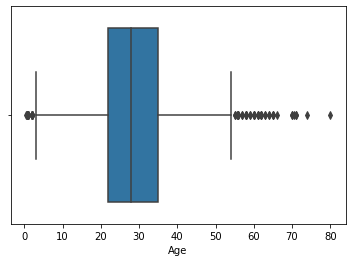

In [286]:
sns.boxplot(x=df['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

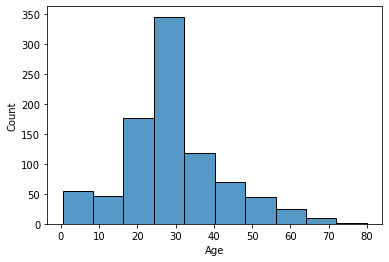

In [287]:
sns.histplot(data['Age'],bins=10,kde=False)

In [288]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [289]:
df['Age'].quantile(0.25)

22.0

In [290]:
df['Age'].quantile(0.75)

35.0

In [291]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

In [292]:
IQR

13.0

In [293]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [294]:
lower_limit

2.5

In [295]:
upper_limit

54.5

### Our upper boundary is 54.5 and our lower boundary is 2.5. 
### This means that these values between 2.5 and 54.5 are acceptable but those outside are outliers. 
### So we need to handle them because they corrupt our data.

In [296]:
outliers_low=(df['Age']<lower_limit)
outliers_up=(df['Age']>upper_limit)


In [297]:
len(df['Age'])-(len(df['Age'][outliers_low]))+(len(df['Age'][outliers_up]))

909

In [298]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [299]:
df['Age'][~(outliers_low|outliers_up)]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 825, dtype: float64

In [300]:
df=df[~(outliers_low | outliers_up)]

In [301]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### We have removed the outliers based on the lower limit and upper limit of Age.
### Let us plot the boxplot now.

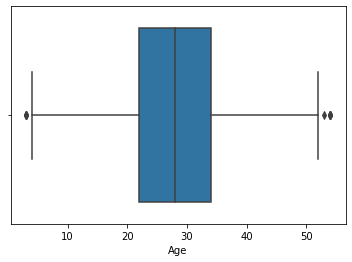

In [302]:
sns.boxplot(x=df['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

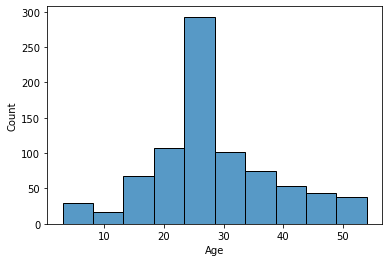

In [303]:
sns.histplot(df['Age'],bins=10,kde=False)

### From the boxplot and histogram, the outliers are removed and distribution appears normal respectively for each.

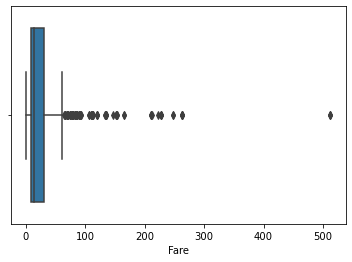

In [304]:
sns.boxplot(x=df['Fare'])
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

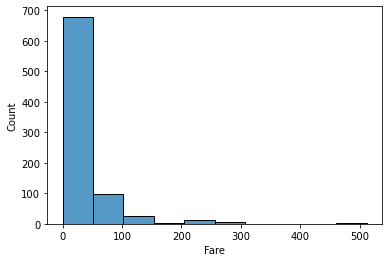

In [305]:
sns.histplot(df['Fare'],bins=10,kde=False)

# Boxplot and Histogram are representing column 'Fare'

In [306]:
df['Fare'].describe()

count    825.000000
mean      31.483615
std       49.956429
min        0.000000
25%        7.895800
50%       13.416700
75%       30.070800
max      512.329200
Name: Fare, dtype: float64

In [307]:
df['Fare'].quantile(0.75)

30.0708

In [308]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1

In [309]:
IQR

22.174999999999997

In [310]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [311]:
upper_limit

63.333299999999994

In [312]:
lower_limit=abs(lower_limit)

In [313]:
df['Fare'].quantile(0.01)

0.0

In [314]:
df['Fare'].quantile(0.98)

211.3375

In [315]:
from scipy.stats.mstats import winsorize 
df_fare_win= winsorize(df['Fare'],(0.01,0.02))

In [316]:
df_fare_win

masked_array(data=[  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,
                     8.4583,  51.8625,  11.1333,  30.0708,  16.7   ,
                     8.05  ,  31.275 ,   7.8542,  13.    ,  18.    ,
                     7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
                    21.075 ,  31.3875,   7.225 , 211.3375,   7.8792,
                     7.8958,  27.7208, 146.5208,   7.75  ,  82.1708,
                    52.    ,   7.2292,   8.05  ,  18.    ,  11.2417,
                     9.475 ,  21.    ,   7.8958,  41.5792,   7.8792,
                     8.05  ,  15.5   ,   7.75  ,  21.6792,  17.8   ,
                    39.6875,   7.8   ,  76.7292,  26.    ,  35.5   ,
                    10.5   ,   7.2292,  27.75  ,  46.9   ,   7.2292,
                    80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
                    10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,
                    46.9   ,  73.5   ,  14.4542,  56.4958,   7.65  ,
                     7.8958,   8.0

<AxesSubplot:>

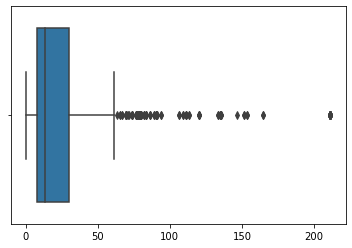

In [317]:
sns.boxplot(x=df_fare_win)

<AxesSubplot:ylabel='Count'>

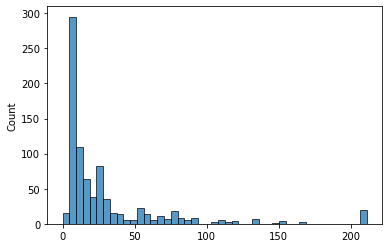

In [318]:
sns.histplot(df_fare_win)

### I tried handling the outliers by winsorize() function but unable to get the outliers removed and get a normalised distribution after

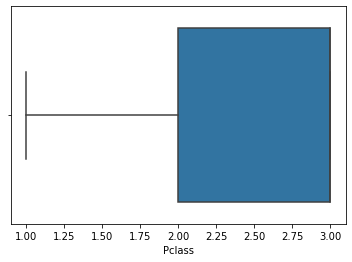

In [319]:
sns.boxplot(x=df['Pclass'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

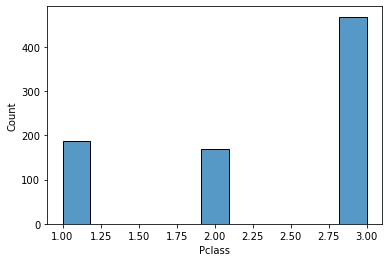

In [320]:
sns.histplot(df['Pclass'])

### No outliers for Pclass field as values are well defined which is evident from histogram and boxplot

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [321]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [322]:
data1=data

In [323]:
import numpy as np
import matplotlib.pyplot as plt

In [324]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [325]:
type(data)

pandas.core.frame.DataFrame

In [326]:
from sklearn import preprocessing

In [244]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [327]:
data1=data1.drop(['Name'],axis=1)
data1=data1.drop(['Sex'],axis=1)
data1=data1.drop(['Cabin'],axis=1)
data1=data1.drop(['Ticket'],axis=1)
data1=data1.drop(['Embarked'],axis=1)

In [ ]:
data=data.drop(['Name'],axis=1)
data=data.drop(['Sex'],axis=1)
data=data.drop(['Cabin'],axis=1)
data=data.drop(['Ticket'],axis=1)
data=data.drop(['Embarked'],axis=1)

In [331]:
data1=min_max.fit_transform(data1)

In [333]:
import numpy as np

In [337]:
data1=pd.DataFrame(data1) 


In [338]:
data1.head()

,0,1,2,3,4,5,6
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713


In [374]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [358]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [363]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [364]:
from sklearn import linear_model
lr=linear_model.LinearRegression()


In [366]:
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [372]:
from sklearn.metrics import mean_squared_error
print("MSE is: \n",mean_squared_error(y_test,predictions))


MSE is: 
 0.19035245931702718


In [373]:
from sklearn.metrics import r2_score
print("R Squared is: \n",r2_score(y_test,predictions))

R Squared is: 
 0.20626887058725063
